## Image Processing in Python

**Course Structure:**
* Chapter 1. Introducing Image Processing and scikit-image
* Chapter 2. Filters, Contrast, Transformation and Morphology
* Chapter 3. Image restoration, Noise, Segmentation and Contours
* Chapter 4. Advanced Operations, Detecting Faces and Features

### CHAPTER 1. Introducing Image Processing and scikit-image

#### Part 1.1 Make images come alive with scikit-learn

**Image Processing:**
* It is an operation on images and videos to:
    * Enhance an image
    * Extract useful information
    * Analyze it and make decisions
* It is a subset of **Computer Vision**
* Its applications:
    * Medical image analysis
    * Artificial intelligence (AI)
    * Image restoration and enhancement
    * Geospatial computing  
    * Surveillance
    * Robotic vision
    * Automotive safety
    * And many more...
* Its purposes:
    1. Visualization -> observe objects that are not visible
    2. Image sharpening and restoration -> a better image
    3. Image retrieval -> seek for the image of interest
    4. Measurement of pattern -> measures various objects
    5. Image recognition -> distinguish objects in an image
       
**Scikit-image library:**
* Easy to use
* Makes use of Machine Learning built-in functions
* Out of the box complex algorithms
* Perform complex operations with just a few functions

**Images:**
* Digital image is a 2-dimensional matrix (columns and rows)
* Pixels contain information about color and intensity
* Color images are represented in RGB - 3 layers (Red, Green, Blue) of 2-dimensional arrays 
* Grayscale images only have intensity value (256 different possible values)    

In [1]:
# pre-defined function to show image
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
# Code for part 1.1 

# is it grayscale or full of color?
from skimage import data

# load two images
coffee_image = data.coffee()
coins_image = data.coins()

# get the image shape (height, width, number of channels)
print(coffee_image.shape[0], coffee_image.shape[1], coffee_image.shape[2])
print(coins_image.shape[0], coins_image.shape[1])


400 600 3
303 384


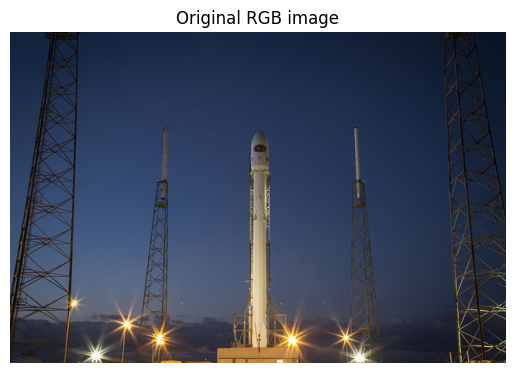

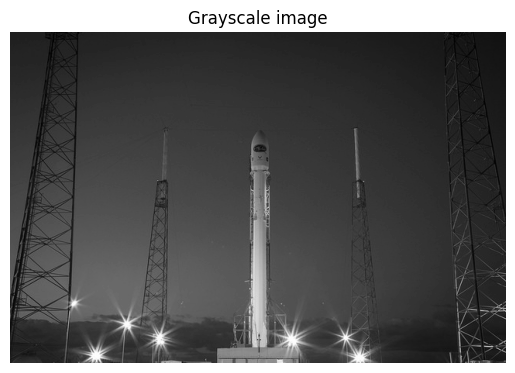

In [4]:
# Code for part 1.1 (continue)

# RGB to grayscale
from skimage import data, color

# load rocket image
rocket = data.rocket()

# convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# show the original image
show_image(rocket, 'Original RGB image')

# show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

#### Part 1.2 NumPy for images

*